In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KernelDensity
import pickle
import random

ANOVA test results in notebook (incorrectly) named fig8a,b where we calculate Lick Interval vs Mean Score of top 20% for GC taste and temp

- looking only at the three temp data for now, can i make a df that has neuronID and columns cont. scores for each alpha value in order? and then make something that shows which alpha is best for each neuron and how high these are or something?

In [44]:
# import scores using each consecutive lick interval, all using the first column as reference neuron names.
file_names = ['BayesScores_TempDat_temps_alphapoint000.pkl',
             'BayesScores_TempDat_temps_alphapoint125.pkl',
             'BayesScores_TempDat_temps_alphapoint250.pkl',
             'BayesScores_TempDat_temps_alphapoint375.pkl',
             'BayesScores_TempDat_temps_alphapoint500.pkl',
             'BayesScores_TempDat_temps_alphapoint625.pkl',
             'BayesScores_TempDat_temps_alphapoint750.pkl',
             'BayesScores_TempDat_temps_alphapoint875.pkl',
             'BayesScores_TempDat_temps_alphaonepoint000.pkl']
file_path = 'C:/Users/anash/OneDrive - Florida State University/BertramNeuroProj/Synthetic_Project/Bayesian Analysis notebooks/BA_TempDat/'
nVSscores = pd.read_pickle(file_path + file_names[0])

for file_name in file_names[1:]:
    current_file = pd.read_pickle(file_path + file_name)
    nVSscores = np.concatenate((nVSscores, current_file[:, 1].reshape(-1, 1)), axis=1)

print(nVSscores)

[[0.00000000e+00 4.88888889e-01 4.92592593e-01 ... 5.77777778e-01
  5.77777778e-01 5.81481481e-01]
 [1.00000000e+00 3.92592593e-01 4.18518519e-01 ... 3.81481481e-01
  3.51851852e-01 3.70370370e-01]
 [2.00000000e+00 2.77777778e-01 3.00000000e-01 ... 3.22222222e-01
  3.14814815e-01 3.88888889e-01]
 ...
 [4.30000000e+02 4.03703704e-01 4.07407407e-01 ... 3.59259259e-01
  3.44444444e-01 3.29629630e-01]
 [4.31000000e+02 2.77777778e-01 3.44444444e-01 ... 3.48148148e-01
  3.37037037e-01 3.74074074e-01]
 [4.32000000e+02 3.14814815e-01 3.07407407e-01 ... 4.11111111e-01
  4.25925926e-01 4.44444444e-01]]


In [45]:
nVSscores.shape

(433, 10)

In [46]:
ScoresDF=pd.DataFrame(nVSscores)
ScoresDF = ScoresDF.rename(columns={0:"neuronID",1:0.000,2:0.125,3:0.250,4:0.375,5:0.500,6:0.625,7:0.750,8:0.875,9:1.000})
# Assuming the 'neuronID' column is not part of the values to compare
ScoresDF['highestVal'] = ScoresDF.iloc[:, 1:].idxmax(axis=1)

In [47]:
ScoresDF

,neuronID,0.0,0.125,0.25,0.375,0.5,0.625,0.75,0.875,1.0,highestVal
0,0.0,0.488889,0.492593,0.514815,0.544444,0.533333,0.544444,0.577778,0.577778,0.581481,1.0
1,1.0,0.392593,0.418519,0.425926,0.433333,0.440741,0.414815,0.381481,0.351852,0.370370,0.5
2,2.0,0.277778,0.300000,0.296296,0.296296,0.292593,0.300000,0.322222,0.314815,0.388889,1.0
3,3.0,0.418519,0.451852,0.492593,0.529630,0.551852,0.648148,0.718519,0.711111,0.700000,0.75
4,4.0,0.385185,0.403704,0.422222,0.444444,0.485185,0.548148,0.574074,0.607407,0.607407,0.875
...,...,...,...,...,...,...,...,...,...,...,...
428,428.0,0.288889,0.348148,0.348148,0.348148,0.348148,0.348148,0.348148,0.348148,0.362963,1.0
429,429.0,0.362963,0.362963,0.370370,0.370370,0.374074,0.381481,0.388889,0.381481,0.437037,1.0
430,430.0,0.403704,0.407407,0.392593,0.385185,0.374074,0.366667,0.359259,0.344444,0.329630,0.125
431,431.0,0.277778,0.344444,0.344444,0.344444,0.348148,0.348148,0.348148,0.337037,0.374074,1.0


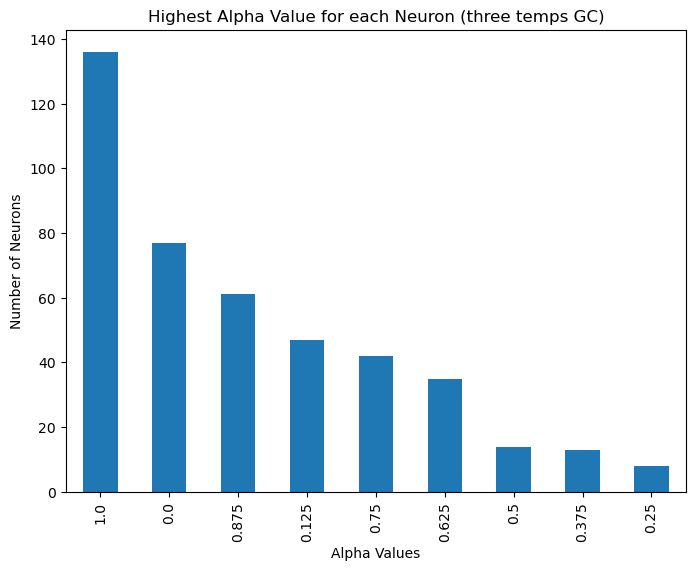

In [6]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each unique value in the 'highestVal' column
value_counts = ScoresDF['highestVal'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Alpha Values')
plt.ylabel('Number of Neurons')
plt.title('Highest Alpha Value for each Neuron (three temps GC)')

# Show the plot
plt.show()


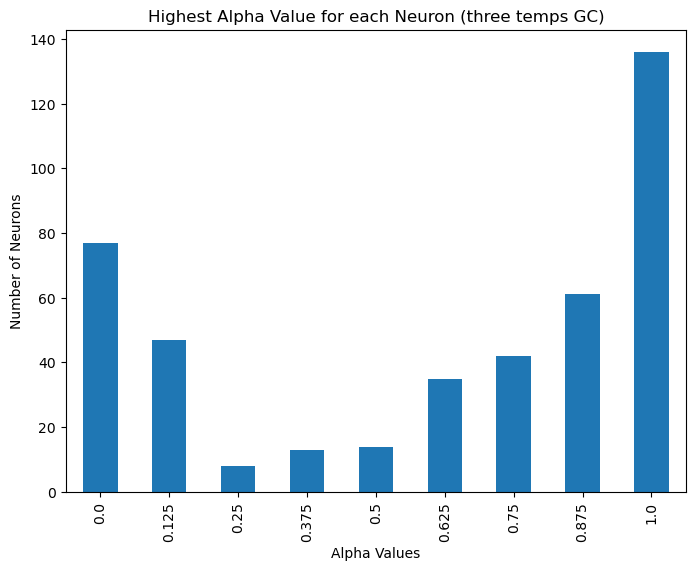

In [7]:
# Count the number of occurrences of each unique value in the 'highestVal' column
value_counts = ScoresDF['highestVal'].value_counts()

# Convert the index to a sorted list
sorted_categories = sorted(value_counts.index.tolist(), key=lambda x: float(x))

# Plot the bar chart
plt.figure(figsize=(8, 6))
value_counts.reindex(sorted_categories).plot(kind='bar')

# Add labels and title
plt.xlabel('Alpha Values')
plt.ylabel('Number of Neurons')
plt.title('Highest Alpha Value for each Neuron (three temps GC)')

# Show the plot
plt.show()

In [8]:
# Create a new DataFrame with NeuronID column
neurons_best_score = pd.DataFrame()
neurons_best_score['NeuronID'] = ScoresDF['neuronID']

# Get the corresponding score for each row based on the column recorded in 'highestVal'
neurons_best_score['HighestScore'] = ScoresDF.apply(lambda row: row[row['highestVal']], axis=1)

neurons_best_score

,NeuronID,HighestScore
0,0.0,0.581481
1,1.0,0.440741
2,2.0,0.388889
3,3.0,0.718519
4,4.0,0.607407
...,...,...
428,428.0,0.362963
429,429.0,0.437037
430,430.0,0.407407
431,431.0,0.374074


In [9]:
dataset2_scores = pd.read_pickle(f'{file_path}/BayesScores_TempDat_temps_alphapoint750.pkl')
sorted_data = dataset2_scores[dataset2_scores[:, 1].argsort()[::-1]]
n_top = int(np.ceil(0.2 * len(dataset2_scores)))
n_ID_list = sorted_data[:n_top, 0].tolist()

In [10]:
len(n_ID_list)

87

In [11]:
sorted_datadiff = np.array(neurons_best_score)[np.array(neurons_best_score)[:, 1].argsort()[::-1]]
n_top2 = int(np.ceil(0.2 * len(np.array(neurons_best_score))))
NBS = sorted_datadiff[:n_top2, 0].tolist()

In [12]:
len(NBS)

87

In [13]:
# Assuming you have two numpy arrays, array1 and array2
array1_first_col = n_ID_list
array2_first_col = NBS

# Convert to sets
set1 = set(array1_first_col)
set2 = set(array2_first_col)

# Find common elements
common_elements = set1.intersection(set2)

# Count of common elements
num_common = len(common_elements)

# Find unique elements
unique_to_array1 = set1 - set2
unique_to_array2 = set2 - set1

# Print results
print(f"Number of common elements: {num_common}")
print(f"Elements in Array 1 but not in Array 2: {unique_to_array1}")
print(f"Elements in Array 2 but not in Array 1: {unique_to_array2}")

Number of common elements: 79
Elements in Array 1 but not in Array 2: {97.0, 10.0, 268.0, 270.0, 18.0, 403.0, 376.0, 251.0}
Elements in Array 2 but not in Array 1: {352.0, 321.0, 133.0, 8.0, 300.0, 47.0, 338.0, 184.0}


now make a plot that shows average of all neurons in top 20% using individual best alphas for each alpha values?

In [14]:
filtered_df = ScoresDF[ScoresDF['neuronID'].isin(NBS)]
filtered_df

,neuronID,0.0,0.125,0.25,0.375,0.5,0.625,0.75,0.875,1.0,highestVal
0,0.0,0.488889,0.492593,0.514815,0.544444,0.533333,0.544444,0.577778,0.577778,0.581481,1.0
3,3.0,0.418519,0.451852,0.492593,0.529630,0.551852,0.648148,0.718519,0.711111,0.700000,0.75
4,4.0,0.385185,0.403704,0.422222,0.444444,0.485185,0.548148,0.574074,0.607407,0.607407,0.875
8,8.0,0.358333,0.362500,0.395833,0.420833,0.437500,0.462500,0.466667,0.470833,0.512500,1.0
12,12.0,0.423529,0.431373,0.431373,0.443137,0.486275,0.513725,0.509804,0.509804,0.521569,1.0
...,...,...,...,...,...,...,...,...,...,...,...
411,411.0,0.288889,0.322222,0.344444,0.400000,0.488889,0.570370,0.592593,0.622222,0.629630,1.0
413,413.0,0.414815,0.429630,0.437037,0.437037,0.488889,0.518519,0.496296,0.462963,0.433333,0.625
416,416.0,0.507407,0.507407,0.522222,0.525926,0.529630,0.540741,0.555556,0.555556,0.533333,0.75
420,420.0,0.633333,0.625926,0.629630,0.625926,0.625926,0.618519,0.611111,0.525926,0.481481,0.0


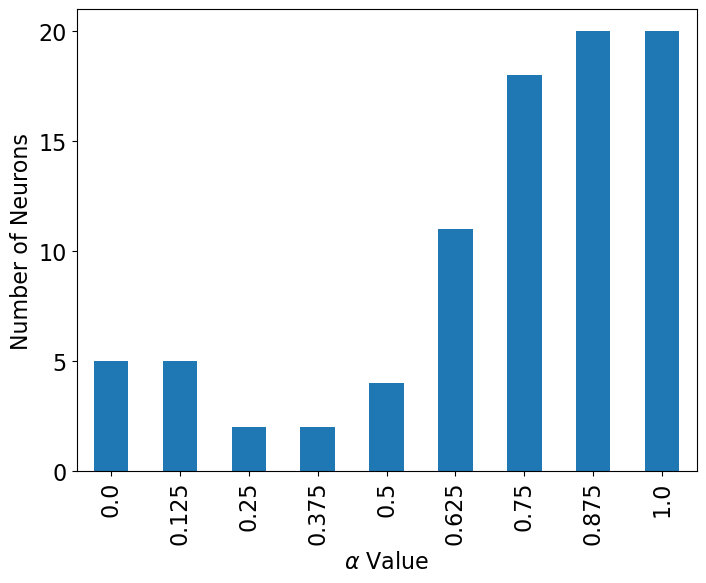

In [17]:
# Count the number of occurrences of each unique value in the 'highestVal' column
value_counts = filtered_df['highestVal'].value_counts()

# Convert the index to a sorted list
sorted_categories = sorted(value_counts.index.tolist(), key=lambda x: float(x))

# Plot the bar chart
plt.figure(figsize=(8, 6))
value_counts.reindex(sorted_categories).plot(kind='bar')

plt.xticks(fontsize=16)
plt.yticks([0,5,10,15,20],fontsize=16)
# Add labels and title
plt.xlabel(r'$\alpha$ Value',fontsize=16)
plt.ylabel('Number of Neurons',fontsize=16)
#plt.title('Highest Alpha Value for each Neuron (four taste GC) in top 20%')
plt.savefig('alpha_per_neuron_3tempGC.svg', format='svg')
# Show the plot

# Show the plot
plt.show()

In [18]:
# Select all columns except the first (neuronID) and the last
columns_to_average = filtered_df.iloc[:, 1:-1]

# Compute the average of each column
column_averages = columns_to_average.mean().tolist()

# Print or save the list of averages
print(column_averages)


[0.46920872006064696, 0.4904400154349445, 0.49955215326581115, 0.5123299765743985, 0.5279476133887898, 0.5435589612601107, 0.5554439026278107, 0.551272802398563, 0.5199779004833095]


In [19]:
scores_columns = nVSscores[:,1:]
top_20_means = [(i+1,np.mean(np.sort(scores_columns[:,i])[::-1][:int(0.2*len(scores_columns[:,i]))])-0.333) for i in range(9)]
each_neuron_alpha = [(i+1,column_averages[i]-0.333) for i in range(9)]
print(top_20_means)

[(1, 0.17363597903337985), (2, 0.18352434629007824), (3, 0.18783777238873006), (4, 0.19531712588723532), (5, 0.20692142123469076), (6, 0.21974091807265544), (7, 0.2280618093843128), (8, 0.22453409476220693), (9, 0.20897079178611316)]


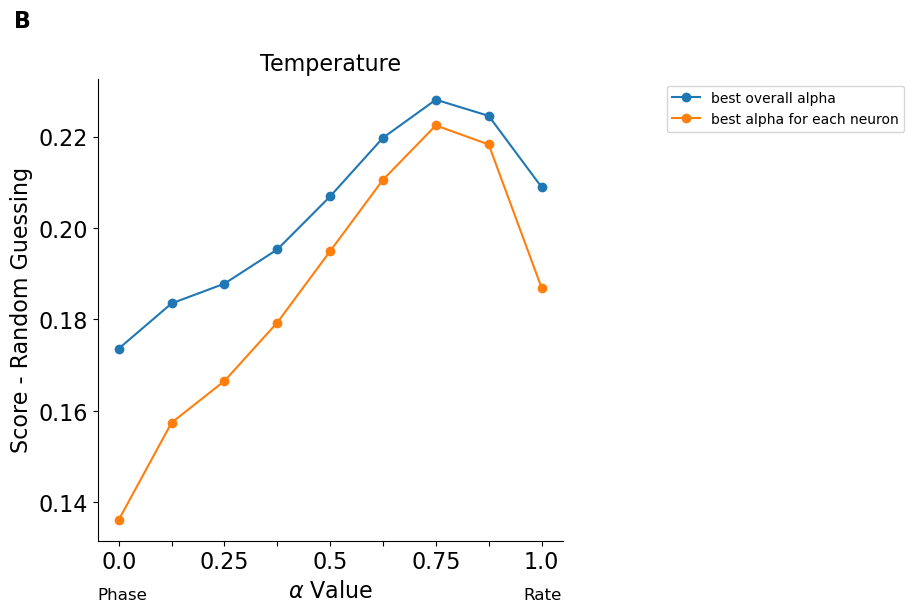

In [20]:
x_values, y_values = zip(*top_20_means)
w_values, z_values = zip(*each_neuron_alpha)

fig, ax = plt.subplots(figsize=(6,6))

ax.plot(x_values, y_values, marker='o', label='best overall alpha')
ax.plot(w_values, z_values, marker='o', label='best alpha for each neuron')
#ax.axhline(y=0.33, color='black', linestyle='--', label='random guessing')

ax.text(0.0, -0.1, 'Phase', transform=ax.transAxes, fontsize=12, va='top', ha='left')
ax.text(0.915, -0.1, 'Rate', transform=ax.transAxes, fontsize=12, va='top', ha='left')


tick_positions = [1, 2,3,4, 5,6, 7, 8, 9]
tick_labels = [0.000,None,0.250,None,0.500,None,0.750,None,1.000]
ax.text(-0.18, 1.15, 'B', transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, fontsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_title('Temperature',fontsize = 16)
ax.set_xlabel(r'$\alpha$ Value',fontsize=16)
ax.set_ylabel('Score - Random Guessing',fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='upper right', bbox_to_anchor=(1.75, 1.0))
plt.show()

# Taste GC

In [21]:
# import scores using each consecutive lick interval, all using the first column as reference neuron names.
file_names = ['BayesScores_taste_nowater_alphapoint000.pkl',
             'BayesScores_taste_nowater_alphapoint125.pkl',
             'BayesScores_taste_nowater_alphapoint250.pkl',
             'BayesScores_taste_nowater_alphapoint375.pkl',
             'BayesScores_taste_nowater_alphapoint500.pkl',
             'BayesScores_taste_nowater_alphapoint625.pkl',
             'BayesScores_taste_nowater_alphapoint750.pkl',
             'BayesScores_taste_nowater_alphapoint875.pkl',
             'BayesScores_taste_nowater_alphaonepoint000.pkl']
file_path = 'C:/Users/anash/OneDrive - Florida State University/BertramNeuroProj/Synthetic_Project/Bayesian Analysis notebooks/BA_TasteDat/'
nVSscores = pd.read_pickle(file_path + file_names[0])

for file_name in file_names[1:]:
    current_file = pd.read_pickle(file_path + file_name)
    nVSscores = np.concatenate((nVSscores, current_file[:, 1].reshape(-1, 1)), axis=1)

print(nVSscores)

[[0.00000000e+00 5.70370370e-01 6.33333333e-01 ... 6.37037037e-01
  6.33333333e-01 5.03703704e-01]
 [1.00000000e+00 2.85185185e-01 3.40740741e-01 ... 3.62962963e-01
  3.37037037e-01 3.55555556e-01]
 [2.00000000e+00 2.59259259e-01 2.81481481e-01 ... 2.81481481e-01
  3.03703704e-01 3.00000000e-01]
 ...
 [5.26000000e+02 3.22222222e-01 3.22222222e-01 ... 2.96296296e-01
  3.22222222e-01 3.22222222e-01]
 [5.27000000e+02 2.37037037e-01 3.11111111e-01 ... 3.03703704e-01
  2.85185185e-01 2.88888889e-01]
 [5.28000000e+02 2.03703704e-01 1.92592593e-01 ... 1.77777778e-01
  1.81481481e-01 2.59259259e-01]]


In [22]:
ScoresDF=pd.DataFrame(nVSscores)

In [23]:
ScoresDF = ScoresDF.rename(columns={0:"neuronID",1:0.000,2:0.125,3:0.250,4:0.375,5:0.500,6:0.625,7:0.750,8:0.875,9:1.000})

In [24]:
# Assuming the 'neuronID' column is not part of the values to compare
ScoresDF['highestVal'] = ScoresDF.iloc[:, 1:].idxmax(axis=1)

In [25]:
ScoresDF

,neuronID,0.0,0.125,0.25,0.375,0.5,0.625,0.75,0.875,1.0,highestVal
0,0.0,0.570370,0.633333,0.570370,0.537037,0.544444,0.592593,0.637037,0.633333,0.503704,0.75
1,1.0,0.285185,0.340741,0.370370,0.325926,0.359259,0.337037,0.362963,0.337037,0.355556,0.25
2,2.0,0.259259,0.281481,0.340741,0.322222,0.344444,0.311111,0.281481,0.303704,0.300000,0.5
3,3.0,0.233333,0.222222,0.214815,0.214815,0.207407,0.248148,0.218519,0.248148,0.170370,0.625
4,4.0,0.307407,0.281481,0.281481,0.277778,0.351852,0.307407,0.340741,0.362963,0.344444,0.875
...,...,...,...,...,...,...,...,...,...,...,...
524,524.0,0.170370,0.325926,0.362963,0.325926,0.318519,0.370370,0.311111,0.344444,0.325926,0.625
525,525.0,0.488889,0.540741,0.488889,0.559259,0.555556,0.551852,0.648148,0.625926,0.566667,0.75
526,526.0,0.322222,0.322222,0.325926,0.318519,0.303704,0.277778,0.296296,0.322222,0.322222,0.25
527,527.0,0.237037,0.311111,0.329630,0.292593,0.311111,0.292593,0.303704,0.285185,0.288889,0.25


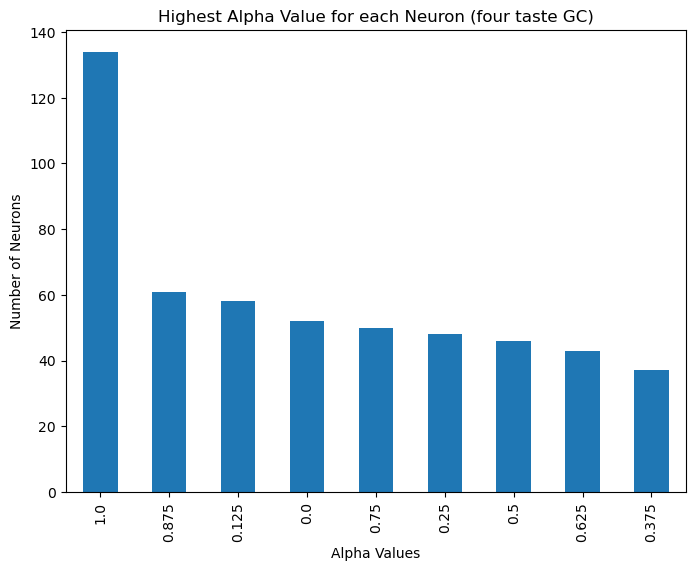

In [26]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each unique value in the 'highestVal' column
value_counts = ScoresDF['highestVal'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Alpha Values')
plt.ylabel('Number of Neurons')
plt.title('Highest Alpha Value for each Neuron (four taste GC)')

# Show the plot
plt.show()


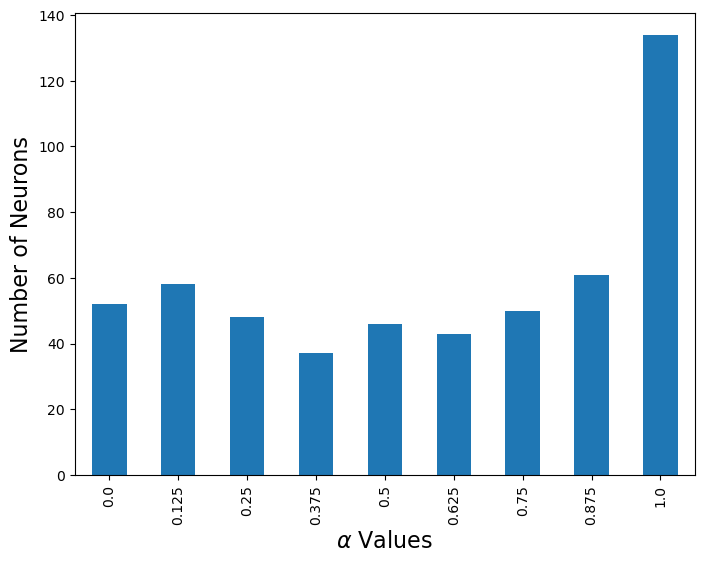

In [27]:
# Count the number of occurrences of each unique value in the 'highestVal' column
value_counts = ScoresDF['highestVal'].value_counts()

# Convert the index to a sorted list
sorted_categories = sorted(value_counts.index.tolist(), key=lambda x: float(x))

# Plot the bar chart
plt.figure(figsize=(8, 6))
value_counts.reindex(sorted_categories).plot(kind='bar')

# Add labels and title
plt.xlabel(r'$\alpha$ Values',fontsize=16)
plt.ylabel('Number of Neurons',fontsize=16)
#plt.title('Highest Alpha Value for each Neuron (four taste GC)')

# Show the plot
plt.show()

In [28]:
# Create a new DataFrame with NeuronID column
neurons_best_score = pd.DataFrame()
neurons_best_score['NeuronID'] = ScoresDF['neuronID']

# Get the corresponding score for each row based on the column recorded in 'highestVal'
neurons_best_score['HighestScore'] = ScoresDF.apply(lambda row: row[row['highestVal']], axis=1)

neurons_best_score

,NeuronID,HighestScore
0,0.0,0.637037
1,1.0,0.370370
2,2.0,0.344444
3,3.0,0.248148
4,4.0,0.362963
...,...,...
524,524.0,0.370370
525,525.0,0.648148
526,526.0,0.325926
527,527.0,0.329630


In [29]:
dataset2_scores = pd.read_pickle(f'{file_path}/BayesScores_taste_nowater_alphapoint875.pkl')
sorted_data = dataset2_scores[dataset2_scores[:, 1].argsort()[::-1]]
n_top = int(np.ceil(0.2 * len(dataset2_scores)))
n_ID_list = sorted_data[:n_top, 0].tolist()

In [30]:
len(n_ID_list)

106

In [31]:
sorted_datadiff = np.array(neurons_best_score)[np.array(neurons_best_score)[:, 1].argsort()[::-1]]
n_top2 = int(np.ceil(0.2 * len(np.array(neurons_best_score))))
NBS = sorted_datadiff[:n_top2, 0].tolist()

In [32]:
len(NBS)

106

In [33]:
# Assuming you have two numpy arrays, array1 and array2
array1_first_col = n_ID_list
array2_first_col = NBS

# Convert to sets
set1 = set(array1_first_col)
set2 = set(array2_first_col)

# Find common elements
common_elements = set1.intersection(set2)

# Count of common elements
num_common = len(common_elements)

# Find unique elements
unique_to_array1 = set1 - set2
unique_to_array2 = set2 - set1

# Print results
print(f"Number of common elements: {num_common}")
print(f"Elements in Array 1 but not in Array 2: {unique_to_array1}")
print(f"Elements in Array 2 but not in Array 1: {unique_to_array2}")

Number of common elements: 80
Elements in Array 1 but not in Array 2: {514.0, 258.0, 4.0, 141.0, 27.0, 38.0, 166.0, 298.0, 172.0, 429.0, 430.0, 436.0, 310.0, 183.0, 313.0, 452.0, 78.0, 212.0, 223.0, 106.0, 490.0, 365.0, 243.0, 374.0, 252.0, 510.0}
Elements in Array 2 but not in Array 1: {386.0, 132.0, 134.0, 521.0, 511.0, 276.0, 21.0, 22.0, 413.0, 162.0, 168.0, 301.0, 303.0, 49.0, 67.0, 68.0, 454.0, 206.0, 79.0, 344.0, 219.0, 349.0, 484.0, 489.0, 253.0, 383.0}


now make a plot that shows average of all neurons in top 20% using individual best alphas for each alpha values?

In [34]:
filtered_df = ScoresDF[ScoresDF['neuronID'].isin(NBS)]
filtered_df

,neuronID,0.0,0.125,0.25,0.375,0.5,0.625,0.75,0.875,1.0,highestVal
0,0.0,0.570370,0.633333,0.570370,0.537037,0.544444,0.592593,0.637037,0.633333,0.503704,0.75
1,1.0,0.285185,0.340741,0.370370,0.325926,0.359259,0.337037,0.362963,0.337037,0.355556,0.25
14,14.0,0.281481,0.322222,0.403704,0.340741,0.322222,0.425926,0.411111,0.425926,0.503704,1.0
15,15.0,0.270370,0.388889,0.422222,0.385185,0.411111,0.411111,0.440741,0.403704,0.340741,0.75
16,16.0,0.244444,0.381481,0.311111,0.318519,0.329630,0.362963,0.322222,0.333333,0.314815,0.125
...,...,...,...,...,...,...,...,...,...,...,...
521,521.0,0.166667,0.211111,0.262963,0.225926,0.233333,0.218519,0.200000,0.188889,0.377778,1.0
522,522.0,0.592593,0.629630,0.607407,0.525926,0.570370,0.629630,0.685185,0.607407,0.548148,0.75
523,523.0,0.455556,0.503704,0.529630,0.548148,0.566667,0.596296,0.562963,0.522222,0.507407,0.625
524,524.0,0.170370,0.325926,0.362963,0.325926,0.318519,0.370370,0.311111,0.344444,0.325926,0.625


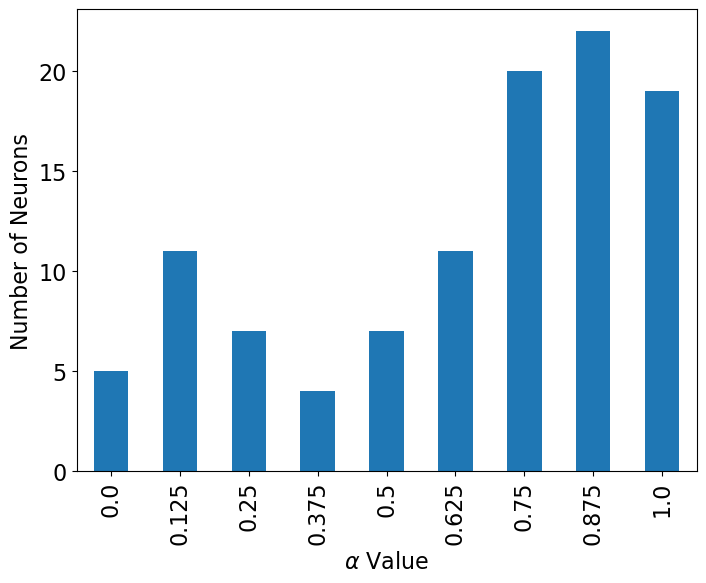

In [35]:
# Count the number of occurrences of each unique value in the 'highestVal' column
value_counts = filtered_df['highestVal'].value_counts()

# Convert the index to a sorted list
sorted_categories = sorted(value_counts.index.tolist(), key=lambda x: float(x))

# Plot the bar chart
plt.figure(figsize=(8, 6))
value_counts.reindex(sorted_categories).plot(kind='bar')
plt.xticks(fontsize=16)
plt.yticks([0,5,10,15,20],fontsize=16)
# Add labels and title
plt.xlabel(r'$\alpha$ Value',fontsize=16)
plt.ylabel('Number of Neurons',fontsize=16)
#plt.title('Highest Alpha Value for each Neuron (four taste GC) in top 20%')
plt.savefig('alpha_per_neuron_4tasteGC.svg', format='svg')
# Show the plot
plt.show()

In [36]:
# Select all columns except the first (neuronID) and the last
columns_to_average = filtered_df.iloc[:, 1:-1]

# Compute the average of each column
column_averages = columns_to_average.mean().tolist()

# Print or save the list of averages
print(column_averages)


[0.3528100730781962, 0.36668391767455666, 0.36378011250842596, 0.36680046302804636, 0.3693956112011343, 0.37906961080547447, 0.38760433525212423, 0.38568414946080115, 0.3682886588631667]


In [37]:
scores_columns = nVSscores[:,1:]
top_20_means = [(i+1,np.mean(np.sort(scores_columns[:,i])[::-1][:int(0.2*len(scores_columns[:,i]))])-0.25) for i in range(9)]
each_neuron_alpha = [(i+1,column_averages[i]-0.25) for i in range(9)]
print(top_20_means)

[(1, 0.12238596062206564), (2, 0.13028242423075093), (3, 0.1282399517611813), (4, 0.13010341467521186), (5, 0.1312935768399427), (6, 0.14096516786351665), (7, 0.148643673693799), (8, 0.15114194671720832), (9, 0.1415324643277613)]


In [38]:
print(each_neuron_alpha)

[(1, 0.10281007307819617), (2, 0.11668391767455666), (3, 0.11378011250842596), (4, 0.11680046302804636), (5, 0.11939561120113429), (6, 0.12906961080547447), (7, 0.13760433525212423), (8, 0.13568414946080115), (9, 0.1182886588631667)]


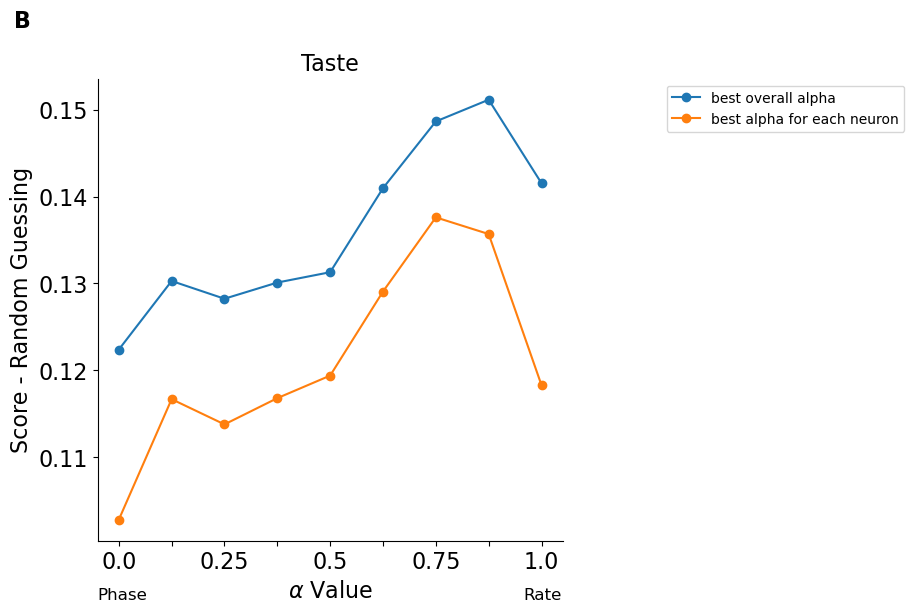

In [39]:
x_values, y_values = zip(*top_20_means)
w_values, z_values = zip(*each_neuron_alpha)

fig, ax = plt.subplots(figsize=(6,6))

ax.plot(x_values, y_values, marker='o', label='best overall alpha')
ax.plot(w_values, z_values, marker='o', label='best alpha for each neuron')
#ax.axhline(y=0.33, color='black', linestyle='--', label='random guessing')

ax.text(0.0, -0.1, 'Phase', transform=ax.transAxes, fontsize=12, va='top', ha='left')
ax.text(0.915, -0.1, 'Rate', transform=ax.transAxes, fontsize=12, va='top', ha='left')


tick_positions = [1, 2,3,4, 5,6, 7, 8, 9]
tick_labels = [0.000,None,0.250,None,0.500,None,0.750,None,1.000]
ax.text(-0.18, 1.15, 'B', transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, fontsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_title('Taste',fontsize = 16)
ax.set_xlabel(r'$\alpha$ Value',fontsize=16)
ax.set_ylabel('Score - Random Guessing',fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='upper right', bbox_to_anchor=(1.75, 1.0))
plt.show()

# Real-time experiment
checking, like R1 asked in paragraph 5, what happens if i omit the "warping" step of my analysis. provide similar type of experiments for three temps in GC? idk that it matters which dataset i choose here. 

In [108]:
def truncate(dataFrame, result = 'post-taste'):
    
    copy_data = dataFrame.copy()
    
    min_index = copy_data.columns.get_loc('Trial') + 1
    min_time = copy_data.columns[min_index]
    max_time = copy_data.columns[-1]
    max_index = copy_data.columns.get_loc(max_time)
    
    taste_index = int(np.floor((max_index + min_index) / 2))
       
    if result == 'pre-taste':
        copy_data.drop(copy_data.iloc[:, taste_index+1:], inplace=True, axis=1)
        return copy_data
    if result == 'post-taste':
        copy_data.drop(copy_data.iloc[:, min_index:taste_index], inplace=True, axis=1)
        return copy_data
    if result == 'one second':
        post_taste = truncate(dataFrame,'post-taste')
        return truncate(post_taste, 'pre-taste')

In [109]:
# import our data, clean it up a little
path = 'C:/Users/anash/OneDrive - Florida State University/Temperature session'
neuronDF = pd.read_pickle(f'{path}/NeuronDF.pickle')
LickDF = pd.read_pickle(f'{path}/LickDF.pickle')

In [110]:
neuronDF

,Recording Type,MouseID,Date,NeuronID,Taste,Neuron,Trial,-2000,-1999,-1998,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,Neuron,CB279,121621,SU_20,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Neuron,CB279,121621,SU_44,0,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Neuron,CB279,121621,SU_48,0,2,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Neuron,CB279,121621,SU_51,0,3,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Neuron,CB279,121621,SU_54,0,4,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34875,Neuron,CB317,111022,SU_68,2,428,29,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34876,Neuron,CB317,111022,SU_74,2,429,29,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34877,Neuron,CB317,111022,SU_82,2,430,29,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34878,Neuron,CB317,111022,SU_89,2,431,29,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
neuronDF = truncate(neuronDF).drop(['MouseID','Date','NeuronID'], axis=1)
LickDF = truncate(LickDF).drop(['MouseID','Date','NeuronID'], axis=1)
LickDF

,Recording Type,Taste,Neuron,Trial,-1,0,1,2,3,4,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,Lick,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Lick,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Lick,0,2,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Lick,0,3,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Lick,0,4,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34875,Lick,2,428,29,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34876,Lick,2,429,29,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34877,Lick,2,430,29,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34878,Lick,2,431,29,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [332]:
df = LickDF.iloc[:,5:]
# Initialize lists to store the average zero counts per row
row_averages = []

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Convert the row to a list for easier manipulation
    row_list = row.tolist()
    
    # Find the positions of the first six ones
    ones_positions = [i for i, value in enumerate(row_list) if value == 1][:6]
    
    # If there are fewer than six ones, skip this row
    if len(ones_positions) < 6:
        continue
    
    # Calculate the number of zeros between each pair of consecutive ones
    zero_counts = [ones_positions[i+1] - ones_positions[i] - 1 for i in range(5)]
    
    # Calculate the average zero count for this row
    row_average = np.mean(zero_counts)
    row_averages.append(row_average)

# Calculate the overall average zero count across all rows
overall_average = np.mean(row_averages)

print("Average zero count per row:", row_averages)
print("Overall average zero count across DataFrame:", overall_average)


Average zero count per row: [142.2, 142.2, 142.2, 142.2, 142.2, 142.2, 142.2, 142.6, 142.6, 142.6, 142.6, 142.6, 142.6, 142.6, 153.6, 153.6, 153.6, 153.6, 153.6, 153.6, 153.6, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 155.0, 155.0, 155.0, 155.0, 155.0, 155.0, 155.0, 154.6, 154.6, 154.6, 154.6, 154.6, 154.6, 154.6, 155.8, 155.8, 155.8, 155.8, 155.8, 155.8, 155.8, 161.8, 161.8, 161.8, 161.8, 161.8, 161.8, 161.8, 153.0, 153.0, 153.0, 153.0, 153.0, 153.0, 153.0, 156.4, 156.4, 156.4, 156.4, 156.4, 156.4, 156.4, 133.8, 133.8, 133.8, 133.8, 133.8, 133.8, 133.8, 140.4, 140.4, 140.4, 140.4, 140.4, 140.4, 140.4, 157.4, 157.4, 157.4, 157.4, 157.4, 157.4, 157.4, 146.8, 146.8, 146.8, 146.8, 146.8, 146.8, 146.8, 154.6, 154.6, 154.6, 154.6, 154.6, 154.6, 154.6, 147.0, 147.0, 147.0, 147.0, 147.0, 147.0, 147.0, 151.2, 151.2, 151.2, 151.2, 151.2, 151.2, 151.2, 141.6, 141.6, 141.6, 141.6, 141.6, 141.6, 141.6, 163.0, 163.0, 163.0, 163.0, 163.0, 163.0, 163.0, 141.0, 141.0, 141.0, 141.0, 141.0, 141.0

In [345]:
overall_average 

146.8799907911019

In [344]:
np.std(row_averages)

20.281980900478523

In [112]:
n_ID_list = [i for i in range(neuronDF['Neuron'].max()+1)]
results = pd.concat([neuronDF.iloc[:,:4].reset_index(drop=True), pd.DataFrame(0,index=range(len(neuronDF)), columns=range(7))], axis = 1).rename(columns={5:'count', 6:'Taste Match'})
n_splits = 15
results

,Recording Type,Taste,Neuron,Trial,0,1,2,3,4,count,Taste Match
0,Neuron,0,0,0,0,0,0,0,0,0,0
1,Neuron,0,1,0,0,0,0,0,0,0,0
2,Neuron,0,2,0,0,0,0,0,0,0,0
3,Neuron,0,3,0,0,0,0,0,0,0,0
4,Neuron,0,4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
34875,Neuron,2,428,29,0,0,0,0,0,0,0
34876,Neuron,2,429,29,0,0,0,0,0,0,0
34877,Neuron,2,430,29,0,0,0,0,0,0,0
34878,Neuron,2,431,29,0,0,0,0,0,0,0


In [316]:
n_stimuli = 3
def bayes_prob(samples, n, alpha, template):
    LP=np.zeros(n_stimuli)
    LR=np.zeros(n_stimuli)
    for taste in template['Taste'].unique():
        # L is list of the likelyhoods 
        # calculate Li values, one for each taste, by taking weighted avg of product of phase probabilities & rate probability
        
        phase_scores = np.squeeze(np.array(template[(template['Taste']==taste)&(template['R or P']=='phase')].dropna(axis=1,how='all').iloc[:,2:]))
        f_vals = []
        
        for spike in samples:
            f_vals.append(phase_scores[spike])
        
        #find the rate value
        rate_scores = np.squeeze(np.array(template[(template['Taste']==taste)&(template['R or P']=='rate')].dropna(axis=1,how='all').iloc[:,2:]))
        LR[taste] = rate_scores[n]
        LP[taste] = np.prod(np.array(f_vals))
        
    dist_prob=np.zeros(n_stimuli)

    for i in range(n_stimuli):
        if (sum(LP) > 0) and (sum(LR) > 0):
            dist_prob[i] = (LP[i]/sum(LP))*(1-alpha) + (LR[i]/sum(LR))*(alpha)
        else:
            dist_prob[i] = LP[i]*(1-alpha) + LR[i]*alpha
     
    return dist_prob

def prep_phase(bandwith, neuron_df, lick_df, LI):
    
    kde_scores = np.zeros(shape = (len(neuron_df['Taste'].unique()),100))
    
    for taste in neuron_df['Taste'].unique():
        tn=neuron_df[(neuron_df['Taste'].isin([taste]))]
        tl=lick_df[(lick_df['Taste'].isin([taste]))]
        
        ty=split_data_one_LI(tn,tl,LI)
        log_dens_scores = apply_kde(ty, bandwith, taste, LI)
        
        if len(neuron_df['Taste'].unique()) == 1:
            kde_scores[0,:] = log_dens_scores
        else:
            kde_scores[taste,:] = log_dens_scores
        
    return kde_scores  

def apply_kde(yvals, bw_size, changer, LI):
    ysum = np.sum(yvals, axis=0)
    vals = np.nonzero(ysum)
    kde_input = vals[0][:, np.newaxis]

    if kde_input.shape ==(0,1):
        # IF WE HAVE NO INFORMATION ON THE PHASE, MAKE IT A UNIFORM VALUE (THAT INT. TO ONE)
        distribution_height = 1 / (99)
        log_dens_scores = np.array([distribution_height] * 100)
    else:
        #check that the li's kde_input isnt empty
        kde = KernelDensity(kernel="gaussian", bandwidth=bw_size).fit(kde_input)
        all_x=np.array([i for i in range(100)])[:, np.newaxis]
        scores = kde.score_samples(all_x)
        log_dens_scores = np.exp(scores)
    return log_dens_scores

#LI goes from 0 to 4
#def split_data_one_LI(neuronDF, licksDF, LI):
    # This function takes dataframes and splits off the first 5 LI of data, writes in np array. 
    # LI needs to be from 0-4.
  #  yvals = np.zeros(shape=(len(licksDF), 100))  # Change to 100 points
 #   for row in range(len(licksDF)):
   #     y = np.zeros(100)  # Change to 100 points
        
   #     l = np.array(licksDF.iloc[row, 4:]).astype(int)
   #     ltimes = np.nonzero(l)
   #     nfires = np.array(neuronDF.iloc[row, 4:]).astype(float)
        
   #     if len(ltimes[0]) >= 6:
   #         start_idx = ltimes[0][LI]  
   #         end_idx = start_idx + 100 
   #         nfires = nfires[start_idx:end_idx]  # Slice nfires for 100 points after start_idx
   #     else:
   #         nfires = nfires[:100]  # Handle case where fewer than 6 ltimes, taking the first 100 points
        
   #     if sum(nfires) != 0.0:
            # tspikes tells you times of where spikes should fall
   #         n = np.nonzero(nfires)
   #         tspikes = np.array([nf for nf in n])
   #         tspikes = ((np.round(tspikes, decimals=3)) * 100).astype(int)  # Adjust scaling to 100 points
        
   #         for i in tspikes[0]:
   #             if 0 <= i < 100:  # Ensure we stay within bounds of the 100-point window
   #                 y[i] = 1.0
        
   #     yvals[row, :] = y
    
  #  return yvals
def split_data_one_LI(neuronDF, licksDF, LI):
    # This function takes dataframes and splits off the first 5 LI of data, writes in np array. 
    # LI needs to be from 0-4.
    yvals = np.zeros(shape=(len(licksDF), 100))  # Change to 100 points
    for row in range(len(licksDF)):
        l = np.array(licksDF.iloc[row, 4:]).astype(int)
        ltimes = np.nonzero(l)
        nfires = np.array(neuronDF.iloc[row, 4:]).astype(float)
        
        if len(ltimes[0]) >= 6:
            start_idx = ltimes[0][LI]  
            end_idx = start_idx + 100 
            nfires = nfires[start_idx:end_idx]  
        else:
            nfires = nfires[-100:]  # Handle case where fewer than 6 ltimes, take last 200 pts
        
        yvals[row, :] = nfires
    
    return yvals


In [317]:
splits = np.array([ 734,  641,  821, 1000,  371,  700,   34,  178,   22,   67,  260, 285,   48,  513,  145])

In [318]:
x_short= np.array([i for i in range(200)])[:,np.newaxis]

taste_list = [0, 1, 2]
LI = [0,1,2,3,4]
#this var needs to go from 0-4 not 1-5

#x_vals = np.array([i for i in range(1000)])[:,np.newaxis]

#alpha = [0.000,0.125,0.250,0.375,0.500,0.625,0.750,0.875,1.000]
alpha = [0.750]
bandwidth_scores = np.zeros(shape=(5,len(n_ID_list),len(alpha)))

for LickInterval in LI:
    for alpha_value in alpha:
        results = pd.concat([neuronDF.iloc[:,:4].reset_index(drop=True), pd.DataFrame(0,index=range(len(neuronDF)), columns=range(5))], axis = 1).rename(columns={3:'count', 4:'Taste Match'})
        for n_ID in n_ID_list:
            for split in splits:
                neuron_df = neuronDF[neuronDF['Neuron'] == n_ID]
                PscoresL = []
                pscore_info = []
                rscore_info = []
                rate_scores = []

                n_train, n_test = train_test_split(neuron_df,
                                                   test_size=0.2, random_state=split)
                l_train = pd.merge(n_train, LickDF, how='inner', on=['Taste', 'Trial', 'Neuron'])
                l_train = l_train.drop(l_train.iloc[:, 4:2005].columns, axis=1).drop(['Recording Type_x'], axis=1).rename(
                    columns={'Recording Type_y': 'Recording Type'})

                l_test = pd.merge(n_test, LickDF, how='inner', on=['Taste', 'Trial', 'Neuron'])
                l_test = l_test.drop(l_test.iloc[:, 4:2005].columns, axis=1).drop(['Recording Type_x'], axis=1).rename(
                    columns={'Recording Type_y': 'Recording Type'})
                # the above makes the names of the columns weird but that should be fine.
                #print(f'check1', end='\r')

                for taste in taste_list:
                    # phase
                    pscore_info.append([taste, 'phase'])
                    #print(f'taste: {taste}')
                    pscores = np.squeeze(prep_phase(5, n_train[(n_train['Taste'].isin([taste]))],
                                                      l_train[(l_train['Taste'].isin([taste]))], LickInterval))

                    PscoresL.append(pscores)
                    #print(f'check1.5 taste {taste}')
                    # rate
                    ty = split_data_one_LI(n_train[(n_train['Taste'].isin([taste]))], l_train[(l_train['Taste'].isin([taste]))],LickInterval)
                    vals = np.sum(ty, axis=1)
                    vals.sort()
                    kde_input = vals[:, np.newaxis]
                    if kde_input.shape == (0, 1):
                        raise NameError(f"{n_ID} rate doesn't have the correct amount of samples")

                    kde = KernelDensity(kernel="gaussian", bandwidth=2).fit(kde_input)
                    rscores = kde.score_samples(x_short)
                    rate_scores.append(np.squeeze(np.array(np.exp(rscores))))

                    rscore_info.append([taste, 'rate'])
                # template = DF of all rate/phase empirical templates for tastes 1-5 from training st
                # phase info into template
                scores = pd.concat([pd.DataFrame(pscore_info).rename(columns={0: 'Taste', 1:'R or P'}),
                                    pd.DataFrame(PscoresL).astype(float)], axis=1)
                # rate info into template
                rscores = pd.concat([pd.DataFrame(rscore_info).rename(columns={0: 'Taste', 1: 'R or P'}),
                                     pd.DataFrame(rate_scores)], axis=1)
                template = pd.concat([scores, rscores.rename(index={0: 5, 1: 6, 2: 7, 3: 8, 4: 9})], axis=0)

                    # care just about the first five LI of data in test just like training
                n_test_short = split_data_one_LI(n_test, l_test,LickInterval)

                    # for each spike train in the test set
                test_set_probability = np.zeros(shape=(len(n_test_short), 3))
                for i in range(len(n_test_short)):
                    # write the spike timings of the test spike train and Nspikes clearly
                    samples = np.array([index for index, value in enumerate(n_test_short[i]) if value != 0])
                    n = samples.size
                    probs = bayes_prob(samples, n,alpha_value, template)
                    #save_test_probs.append(probs)

                    test_set_probability[i, :] = probs

                    # add this info to results
                    index = results[(results['Taste'] == n_test.iloc[i, 1]) & (results['Neuron'] == n_test.iloc[i, 2]) & (
                                results['Trial'] == n_test.iloc[i, 3])].index[0]
                    # this updates the count column, which makes sure that we are keeping track of all trials that are in our test set 
                    results.iloc[index, -2] = results.iloc[index, -2] + 1
                    if (np.argmax(probs) == n_test.iloc[i, 1]):
                        results.iloc[index, -1] = results.iloc[index, -1] + 1

                    #add one to the column of results that the classifier guesses (column names 0,1,2 but indexes 4,5,6)
                    # no longer save the probabilities bc we werent using them anyways
                    results.iloc[index, np.argmax(probs)+4] = 1 + results.iloc[index, np.argmax(probs)+4]

            print(f'neuronID {n_ID} done', end='\r')
        nonzero_results = results[results['count'] != 0]
        for neuron in range(433):
            neuron_results = nonzero_results[nonzero_results['Neuron'] == neuron]
            bandwidth_scores[LickInterval,neuron,alpha.index(alpha_value)] = (neuron_results['Taste Match'].sum())/(neuron_results['count'].sum())
        print(f'alpha {alpha_value} done')

alpha 0.75 donene
alpha 0.75 donene
alpha 0.75 donene
alpha 0.75 donene
alpha 0.75 donene


In [319]:
filename = 'BayesScores_TempDat_temps_alphapoint750_eachLI_nowarping.pkl'
with open(filename, 'wb') as file:
    pickle.dump(bandwidth_scores, file)

In [320]:
bandwidth_scores.shape

(5, 433, 1)

In [321]:
li1_nowarp = np.sort(bandwidth_scores[0][:,0])[::-1][:int(0.2*433)]
li2_nowarp = np.sort(bandwidth_scores[1][:,0])[::-1][:int(0.2*433)]
li3_nowarp = np.sort(bandwidth_scores[2][:,0])[::-1][:int(0.2*433)]
li4_nowarp = np.sort(bandwidth_scores[3][:,0])[::-1][:int(0.2*433)]
li5_nowarp = np.sort(bandwidth_scores[4][:,0])[::-1][:int(0.2*433)]

In [322]:
# import scores using each consecutive lick interval, all using the first column as reference neuron names.
file_names = ['BayesScores_TempDat_temps_alphapoint875_li0.pkl',
             'BayesScores_TempDat_temps_alphapoint875_li1.pkl',
             'BayesScores_TempDat_temps_alphapoint875_li2.pkl',
             'BayesScores_TempDat_temps_alphapoint875_li3.pkl',
             'BayesScores_TempDat_temps_alphapoint875_li4.pkl']
file_path = 'C:/Users/anash/OneDrive - Florida State University/BertramNeuroProj/Synthetic_Project/Bayesian Analysis notebooks/BA_TempDat/'
nVSscores = pd.read_pickle(file_path + file_names[0])

for file_name in file_names[1:]:
    current_file = pd.read_pickle(file_path + file_name)
    nVSscores = np.concatenate((nVSscores, current_file[:, 1].reshape(-1, 1)), axis=1)

print(nVSscores)

[[0.00000000e+00 5.48148148e-01 5.88888889e-01 4.81481481e-01
  3.81481481e-01 2.81481481e-01]
 [1.00000000e+00 4.88888889e-01 4.14814815e-01 3.11111111e-01
  2.74074074e-01 3.81481481e-01]
 [2.00000000e+00 3.18518519e-01 2.88888889e-01 3.33333333e-01
  2.96296296e-01 3.14814815e-01]
 ...
 [4.30000000e+02 2.48148148e-01 3.29629630e-01 2.33333333e-01
  2.66666667e-01 3.85185185e-01]
 [4.31000000e+02 3.66666667e-01 3.22222222e-01 3.51851852e-01
  2.88888889e-01 3.77777778e-01]
 [4.32000000e+02 3.00000000e-01 3.51851852e-01 3.77777778e-01
  3.33333333e-01 2.92592593e-01]]


In [323]:
scores_columns = nVSscores[:,1:]
scores_columns.shape

(433, 5)

In [324]:
li1_warp = np.sort(scores_columns[:,0])[::-1][:int(0.2*433)]
li2_warp = np.sort(scores_columns[:,1])[::-1][:int(0.2*433)]
li3_warp = np.sort(scores_columns[:,2])[::-1][:int(0.2*433)]
li4_warp = np.sort(scores_columns[:,3])[::-1][:int(0.2*433)]
li5_warp = np.sort(scores_columns[:,4])[::-1][:int(0.2*433)]

In [325]:
scores_columns[:,0].shape

(433,)

In [326]:
fpath = 'C:/Users/anash/OneDrive - Florida State University/BertramNeuroProj/Synthetic_Project/Bayesian Analysis notebooks/'
nowarp150sc = pd.read_pickle(f"{fpath}BayesScores_TempDat_temps_alphapoint750_eachLI_nowarping150ms.pkl")
nowarp200sc = pd.read_pickle(f"{fpath}BayesScores_TempDat_temps_alphapoint750_eachLI_nowarping200ms.pkl")

In [327]:
nowarp150sc.shape

(5, 433, 1)

In [328]:
li1_nowarp150 = np.sort(nowarp150sc[0][:,0])[::-1][:int(0.2*433)]
li2_nowarp150 = np.sort(nowarp150sc[1][:,0])[::-1][:int(0.2*433)]
li3_nowarp150 = np.sort(nowarp150sc[2][:,0])[::-1][:int(0.2*433)]
li4_nowarp150 = np.sort(nowarp150sc[3][:,0])[::-1][:int(0.2*433)]
li5_nowarp150 = np.sort(nowarp150sc[4][:,0])[::-1][:int(0.2*433)]

In [329]:
li1_nowarp200 = np.sort(nowarp200sc[0][:,0])[::-1][:int(0.2*433)]
li2_nowarp200 = np.sort(nowarp200sc[1][:,0])[::-1][:int(0.2*433)]
li3_nowarp200 = np.sort(nowarp200sc[2][:,0])[::-1][:int(0.2*433)]
li4_nowarp200 = np.sort(nowarp200sc[3][:,0])[::-1][:int(0.2*433)]
li5_nowarp200 = np.sort(nowarp200sc[4][:,0])[::-1][:int(0.2*433)]

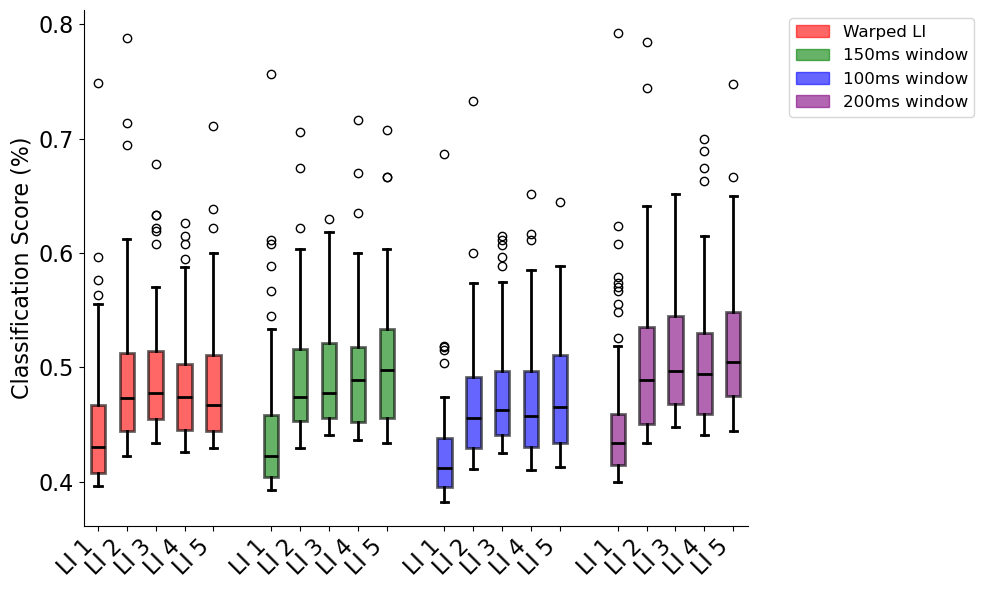

In [346]:
fig1, ax1 = plt.subplots(figsize=(10, 6))  # Adjusted width for spacing

# Plot only the actual data while adjusting positions to create gaps
data = [li1_warp, li2_warp, li3_warp, li4_warp, li5_warp,     # Red group
        li1_nowarp150, li2_nowarp150, li3_nowarp150, li4_nowarp150, li5_nowarp150,  # Green group
        li1_nowarp, li2_nowarp, li3_nowarp, li4_nowarp, li5_nowarp,  # Blue group
        li1_nowarp200, li2_nowarp200, li3_nowarp200, li4_nowarp200, li5_nowarp200]  # Purple group

# Create boxplot without modifying the actual data positions
boxplot1 = ax1.boxplot(data, patch_artist=True, showmeans=False, widths=0.5, positions=[1,2,3,4,5,  # Red group
                                                                                       7,8,9,10,11,  # Green group
                                                                                       13,14,15,16,17,  # Blue group
                                                                                       19,20,21,22,23])  # Purple group

# Set x-ticks with gaps for the groups
ax1.set_xticks([1,2,3,4,5, 7,8,9,10,11, 13,14,15,16,17, 19,20,21,22,23])
ax1.set_xticklabels(
    ['LI 1', 'LI 2', 'LI 3', 'LI 4', 'LI 5',  # Red group
     'LI 1', 'LI 2', 'LI 3', 'LI 4', 'LI 5',  # Green group
     'LI 1', 'LI 2', 'LI 3', 'LI 4', 'LI 5',  # Blue group
     'LI 1', 'LI 2', 'LI 3', 'LI 4', 'LI 5'],  # Purple group
    fontsize=16, rotation=45, ha='right')

# Set y-axis label and tick parameters
ax1.set_ylabel('Classification Score (%)', fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=16)

# Customize colors with opacity for each group
colors1 = [
    'red', 'red', 'red', 'red', 'red',  # Red group
    'green', 'green', 'green', 'green', 'green',  # Green group
    'blue', 'blue', 'blue', 'blue', 'blue',  # Blue group
    'purple', 'purple', 'purple', 'purple', 'purple']  # Purple group

# Set face color and opacity for each box
for patch, color in zip(boxplot1['boxes'], colors1):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)  # Set opacity for the box face color

# Adjust the line thickness for the boxplot
for element in ['boxes', 'whiskers', 'caps']:
    plt.setp(boxplot1[element], linewidth=2.0)

# Setting median line color and thickness
plt.setp(boxplot1['medians'], color='black', linewidth=2.0)

# Removing the right and top spines for the first panel
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Creating custom legend handles
red_patch = mpatches.Patch(color='red', alpha=0.6, label='Warped LI')
green_patch = mpatches.Patch(color='green', alpha=0.6, label='150ms window')
blue_patch = mpatches.Patch(color='blue', alpha=0.6, label='100ms window')
purple_patch = mpatches.Patch(color='purple', alpha=0.6, label='200ms window')

# Adding legend to the plot
ax1.legend(handles=[red_patch, green_patch, blue_patch, purple_patch], fontsize=12, loc='upper left', bbox_to_anchor=(1.05, 1))


plt.tight_layout()
# plt.savefig('panel1.svg', format='svg')
plt.show()


first test: 1000ms, no warping. 

In [119]:
neuron_vs_score = pd.read_pickle(f'{path}/BA_TempDat/BayesScores_TempDat_temps_alphapoint750_allLicks_nowarping.pkl')

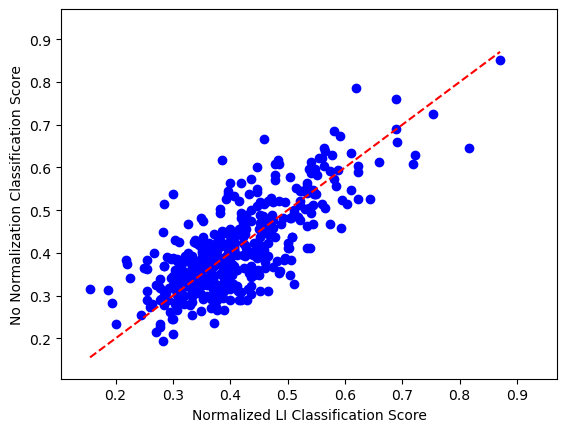

In [127]:
xwarped = nVSscores[:, -3]
ynowarp = neuron_vs_score[:, 1]

# Create scatter plot
plt.scatter(xwarped, ynowarp, color='blue', label='Neuron Scores')

# Add diagonal dashed line (y = x)
min_val = min(min(xwarped), min(ynowarp))
max_val = max(max(xwarped), max(ynowarp))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Diagonal (y=x)')

# Add labels and title
plt.xlabel('Normalized LI Classification Score')
plt.ylabel('No Normalization Classification Score')
#plt.title('Scatter plot with Diagonal Line')

plt.xlim(min_val-0.05, max_val+0.1)
plt.ylim(min_val-0.05, max_val+0.1)
# Display legend and plot
#plt.legend()
plt.show()


### now: manipulate scores to find best score and alpha per neuron, then remake plot

In [48]:
#open file with cold vs hot scores (temp codes 0 vs 1)
path = 'C:/Users/anash/OneDrive - Florida State University/BertramNeuroProj/Synthetic_Project/Bayesian Analysis notebooks'
coldhot = pd.read_pickle(f'{path}/BA_TempDat/BayesScores_TempDat_01_alphapoint875.pkl')
coldrt = pd.read_pickle(f'{path}/BA_TempDat/BayesScores_TempDat_02_alphapoint875.pkl')
rthot = pd.read_pickle(f'{path}/BA_TempDat/BayesScores_TempDat_21_alphapoint875.pkl')

In [49]:
dataset1_scores = np.sort(coldhot[:,1])[::-1][:int(0.2*len(coldhot[:,1]))]
dataset8_scores = np.sort(coldrt[:,1])[::-1][:int(0.2*len(coldrt[:,1]))]
dataset9_scores = np.sort(rthot[:,1])[::-1][:int(0.2*len(rthot[:,1]))]


In [50]:
nID = nVSscores[:,0]
allalphacoldhot = np.column_stack((nID, pd.read_pickle(f'{path}/BA_TempDat/BayesScores_TempDat_01_allalpha.pkl')))
allalphacoldrt = np.column_stack((nID, pd.read_pickle(f'{path}/BA_TempDat/BayesScores_TempDat_02_allalpha.pkl')))
allalpharthot = np.column_stack((nID, pd.read_pickle(f'{path}/BA_TempDat/BayesScores_TempDat_21_allalpha.pkl')))

In [51]:
ScoresDFCH=pd.DataFrame(allalphacoldhot)
ScoresDFCH = ScoresDFCH.rename(columns={0:"neuronID",1:0.000,2:0.125,3:0.250,4:0.375,5:0.500,6:0.625,7:0.750,8:0.875,9:1.000})
# Assuming the 'neuronID' column is not part of the values to compare
ScoresDFCH['highestVal'] = ScoresDFCH.iloc[:, 1:].idxmax(axis=1)
# Create a new DataFrame with NeuronID column
neurons_best_score_ch = pd.DataFrame()
neurons_best_score_ch['NeuronID'] = ScoresDFCH['neuronID']

# Get the corresponding score for each row based on the column recorded in 'highestVal'
neurons_best_score_ch['HighestScore'] = ScoresDFCH.apply(lambda row: row[row['highestVal']], axis=1)

neurons_best_score_ch = np.array(neurons_best_score_ch)
ch_scores = np.sort(neurons_best_score_ch[:,1])[::-1][:int(0.2*len(neurons_best_score_ch[:,1]))]

In [52]:
ScoresDFCRT=pd.DataFrame(allalphacoldrt)
ScoresDFCRT = ScoresDFCRT.rename(columns={0:"neuronID",1:0.000,2:0.125,3:0.250,4:0.375,5:0.500,6:0.625,7:0.750,8:0.875,9:1.000})
# Assuming the 'neuronID' column is not part of the values to compare
ScoresDFCRT['highestVal'] = ScoresDFCRT.iloc[:, 1:].idxmax(axis=1)
# Create a new DataFrame with NeuronID column
neurons_best_score_crt = pd.DataFrame()
neurons_best_score_crt['NeuronID'] = ScoresDFCRT['neuronID']

# Get the corresponding score for each row based on the column recorded in 'highestVal'
neurons_best_score_crt['HighestScore'] = ScoresDFCRT.apply(lambda row: row[row['highestVal']], axis=1)

neurons_best_score_crt = np.array(neurons_best_score_crt)
crt_scores = np.sort(neurons_best_score_crt[:,1])[::-1][:int(0.2*len(neurons_best_score_crt[:,1]))]

In [53]:
ScoresDFRTH=pd.DataFrame(allalpharthot)
ScoresDFRTH = ScoresDFRTH.rename(columns={0:"neuronID",1:0.000,2:0.125,3:0.250,4:0.375,5:0.500,6:0.625,7:0.750,8:0.875,9:1.000})
# Assuming the 'neuronID' column is not part of the values to compare
ScoresDFRTH['highestVal'] = ScoresDFRTH.iloc[:, 1:].idxmax(axis=1)
# Create a new DataFrame with NeuronID column
neurons_best_score_rth = pd.DataFrame()
neurons_best_score_rth['NeuronID'] = ScoresDFRTH['neuronID']

# Get the corresponding score for each row based on the column recorded in 'highestVal'
neurons_best_score_rth['HighestScore'] = ScoresDFRTH.apply(lambda row: row[row['highestVal']], axis=1)

neurons_best_score_rth = np.array(neurons_best_score_rth)
rth_scores = np.sort(neurons_best_score_rth[:,1])[::-1][:int(0.2*len(neurons_best_score_rth[:,1]))]

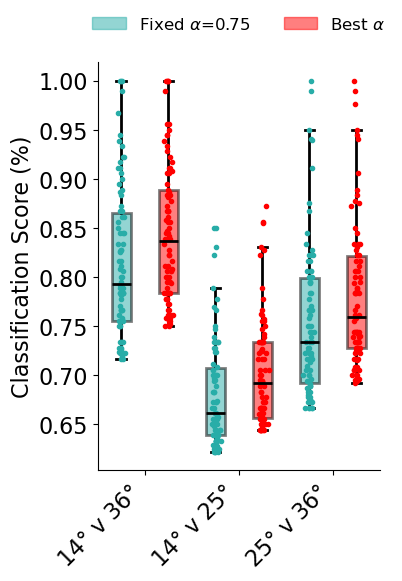

In [77]:
fig1, ax1 = plt.subplots(figsize=(4, 6))

boxplot1 = ax1.boxplot([dataset1_scores, ch_scores, dataset8_scores, crt_scores, dataset9_scores, rth_scores], 
                       patch_artist=True, showmeans=False, widths=0.4,
                       flierprops=dict(marker=None)) 

ax1.set_xticks([1.5,3.5,5.5]) 
ax1.set_xticklabels([r'$14\degree$ v $36\degree$',r'$14\degree$ v $25\degree$', r'$25\degree$ v $36\degree$'], fontsize=16, rotation=45, ha='right')  # Rotate labels
ax1.set_ylabel('Classification Score (%)', fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=16)

colors1 = ['#28ada8','red', '#28ada8','red', '#28ada8','red']
for patch, color in zip(boxplot1['boxes'], colors1):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)  

for element in ['boxes', 'whiskers', 'caps']:
    plt.setp(boxplot1[element], linewidth=2.0)  

plt.setp(boxplot1['medians'], color='black', linewidth=2.0)


for i, (scores, color) in enumerate(zip([dataset1_scores, ch_scores, dataset8_scores, crt_scores, dataset9_scores, rth_scores], colors1)):
    x = np.random.normal(i + 1, 0.04, size=len(scores))  # Adjusted x positions
    ax1.plot(x, scores, '.', color=color, alpha=1.0)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Creating legend patches
fixed_alpha_patch = mpatches.Patch(color='#28ada8', alpha=0.5, label=r'Fixed $\alpha$=0.75')
best_alpha_patch = mpatches.Patch(color='red', alpha=0.5, label=r'Best $\alpha$')

# Adding the legend at the top of the plot
ax1.legend(handles=[fixed_alpha_patch, best_alpha_patch], loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, fontsize=12, frameon=False)


plt.tight_layout()
plt.savefig('GCtemps_popalpha_vs_individalpha.svg', format='svg')
plt.show()


In [58]:
from scipy.stats import ttest_rel, wilcoxon

# Assuming your data arrays are named as follows:
datasets = [dataset1_scores, ch_scores, dataset8_scores, crt_scores, dataset9_scores, rth_scores]

# Initialize an empty dictionary to store p-values
p_values = {}

# Paired t-test and Wilcoxon tests between adjacent boxplots
for i in range(len(datasets) - 1):
    # Conduct paired t-test
    t_stat, p_ttest = ttest_rel(datasets[i], datasets[i+1])
    
    # Conduct Wilcoxon signed-rank test for non-parametric alternative
    _, p_wilcoxon = wilcoxon(datasets[i], datasets[i+1])

    # Store results
    p_values[f'Pair {i+1} vs {i+2}'] = {'Paired t-test p-value': p_ttest, 'Wilcoxon p-value': p_wilcoxon}

# Display results
for pair, results in p_values.items():
    print(f"{pair}:")
    for test, p_value in results.items():
        print(f"  {test}: {p_value:.4f}")


Pair 1 vs 2:
  Paired t-test p-value: 0.0000
  Wilcoxon p-value: 0.0000
Pair 2 vs 3:
  Paired t-test p-value: 0.0000
  Wilcoxon p-value: 0.0000
Pair 3 vs 4:
  Paired t-test p-value: 0.0000
  Wilcoxon p-value: 0.0000
Pair 4 vs 5:
  Paired t-test p-value: 0.0000
  Wilcoxon p-value: 0.0000
Pair 5 vs 6:
  Paired t-test p-value: 0.0000
  Wilcoxon p-value: 0.0000


now do the same thing for GC temps:


In [59]:
nID = np.array(neurons_best_score)[:,0]

In [60]:
#open file with cold vs hot scores (temp codes 0 vs 1)
path = 'C:/Users/anash/OneDrive - Florida State University/BertramNeuroProj/Synthetic_Project/Bayesian Analysis notebooks'
ds1 = np.column_stack((nID, pd.read_pickle(f'{path}/BA_TempDat/BayesScores_TasteDat_23_allalpha.pkl')))
ds2 = np.column_stack((nID, pd.read_pickle(f'{path}/BA_TempDat/BayesScores_TasteDat_01_allalpha.pkl')))
ds3 = np.column_stack((nID, pd.read_pickle(f'{path}/BA_TempDat/BayesScores_TasteDat_02_allalpha.pkl')))
ds4 = np.column_stack((nID, pd.read_pickle(f'{path}/BA_TempDat/BayesScores_TasteDat_03_allalpha.pkl')))
ds5 = np.column_stack((nID, pd.read_pickle(f'{path}/BA_TempDat/BayesScores_TasteDat_21_allalpha.pkl')))
ds6 = np.column_stack((nID, pd.read_pickle(f'{path}/BA_TempDat/BayesScores_TasteDat_31_allalpha.pkl')))

In [61]:
Scores=pd.DataFrame(ds1)
Scores = Scores.rename(columns={0:"neuronID",1:0.000,2:0.125,3:0.250,4:0.375,5:0.500,6:0.625,7:0.750,8:0.875,9:1.000})
Scores['highestVal'] = Scores.iloc[:, 1:].idxmax(axis=1)
# Create a new DataFrame with NeuronID column
neurons_best_score = pd.DataFrame()
neurons_best_score['NeuronID'] = Scores['neuronID']

# Get the corresponding score for each row based on the column recorded in 'highestVal'
neurons_best_score['HighestScore'] = Scores.apply(lambda row: row[row['highestVal']], axis=1)

neurons_best_score = np.array(neurons_best_score)
ds1_scores = np.sort(neurons_best_score[:,1])[::-1][:int(0.2*len(neurons_best_score[:,1]))]

In [62]:
Scores=pd.DataFrame(ds2)
Scores = Scores.rename(columns={0:"neuronID",1:0.000,2:0.125,3:0.250,4:0.375,5:0.500,6:0.625,7:0.750,8:0.875,9:1.000})
Scores['highestVal'] = Scores.iloc[:, 1:].idxmax(axis=1)
# Create a new DataFrame with NeuronID column
neurons_best_score = pd.DataFrame()
neurons_best_score['NeuronID'] = Scores['neuronID']

# Get the corresponding score for each row based on the column recorded in 'highestVal'
neurons_best_score['HighestScore'] = Scores.apply(lambda row: row[row['highestVal']], axis=1)

neurons_best_score = np.array(neurons_best_score)
ds2_scores = np.sort(neurons_best_score[:,1])[::-1][:int(0.2*len(neurons_best_score[:,1]))]

In [63]:
Scores=pd.DataFrame(ds3)
Scores = Scores.rename(columns={0:"neuronID",1:0.000,2:0.125,3:0.250,4:0.375,5:0.500,6:0.625,7:0.750,8:0.875,9:1.000})
Scores['highestVal'] = Scores.iloc[:, 1:].idxmax(axis=1)
# Create a new DataFrame with NeuronID column
neurons_best_score = pd.DataFrame()
neurons_best_score['NeuronID'] = Scores['neuronID']

# Get the corresponding score for each row based on the column recorded in 'highestVal'
neurons_best_score['HighestScore'] = Scores.apply(lambda row: row[row['highestVal']], axis=1)

neurons_best_score = np.array(neurons_best_score)
ds3_scores = np.sort(neurons_best_score[:,1])[::-1][:int(0.2*len(neurons_best_score[:,1]))]

In [64]:
Scores=pd.DataFrame(ds4)
Scores = Scores.rename(columns={0:"neuronID",1:0.000,2:0.125,3:0.250,4:0.375,5:0.500,6:0.625,7:0.750,8:0.875,9:1.000})
Scores['highestVal'] = Scores.iloc[:, 1:].idxmax(axis=1)
# Create a new DataFrame with NeuronID column
neurons_best_score = pd.DataFrame()
neurons_best_score['NeuronID'] = Scores['neuronID']

# Get the corresponding score for each row based on the column recorded in 'highestVal'
neurons_best_score['HighestScore'] = Scores.apply(lambda row: row[row['highestVal']], axis=1)

neurons_best_score = np.array(neurons_best_score)
ds4_scores = np.sort(neurons_best_score[:,1])[::-1][:int(0.2*len(neurons_best_score[:,1]))]

In [65]:
ds4_scores

array([0.93333333, 0.92121212, 0.91333333, 0.9037037 , 0.88148148,
       0.88      , 0.87407407, 0.82962963, 0.81481481, 0.80740741,
       0.80740741, 0.8       , 0.79259259, 0.78518519, 0.78333333,
       0.75833333, 0.75333333, 0.75      , 0.74814815, 0.74814815,
       0.74166667, 0.74074074, 0.73333333, 0.73333333, 0.71851852,
       0.71851852, 0.71428571, 0.71333333, 0.71111111, 0.71111111,
       0.70833333, 0.70833333, 0.7037037 , 0.7037037 , 0.7037037 ,
       0.7037037 , 0.7       , 0.7       , 0.7       , 0.6962963 ,
       0.6962963 , 0.69166667, 0.69166667, 0.68888889, 0.68888889,
       0.68888889, 0.68666667, 0.68666667, 0.68333333, 0.68148148,
       0.68      , 0.675     , 0.675     , 0.675     , 0.675     ,
       0.675     , 0.67407407, 0.66666667, 0.66666667, 0.66666667,
       0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
       0.66666667, 0.66666667, 0.66      , 0.66      , 0.65925926,
       0.65925926, 0.65925926, 0.65833333, 0.65833333, 0.65833

In [66]:
Scores=pd.DataFrame(ds5)
Scores = Scores.rename(columns={0:"neuronID",1:0.000,2:0.125,3:0.250,4:0.375,5:0.500,6:0.625,7:0.750,8:0.875,9:1.000})
Scores['highestVal'] = Scores.iloc[:, 1:].idxmax(axis=1)
# Create a new DataFrame with NeuronID column
neurons_best_score = pd.DataFrame()
neurons_best_score['NeuronID'] = Scores['neuronID']

# Get the corresponding score for each row based on the column recorded in 'highestVal'
neurons_best_score['HighestScore'] = Scores.apply(lambda row: row[row['highestVal']], axis=1)

neurons_best_score = np.array(neurons_best_score)
ds5_scores = np.sort(neurons_best_score[:,1])[::-1][:int(0.2*len(neurons_best_score[:,1]))]

In [67]:
Scores=pd.DataFrame(ds6)
Scores = Scores.rename(columns={0:"neuronID",1:0.000,2:0.125,3:0.250,4:0.375,5:0.500,6:0.625,7:0.750,8:0.875,9:1.000})
Scores['highestVal'] = Scores.iloc[:, 1:].idxmax(axis=1)
# Create a new DataFrame with NeuronID column
neurons_best_score = pd.DataFrame()
neurons_best_score['NeuronID'] = Scores['neuronID']

# Get the corresponding score for each row based on the column recorded in 'highestVal'
neurons_best_score['HighestScore'] = Scores.apply(lambda row: row[row['highestVal']], axis=1)

neurons_best_score = np.array(neurons_best_score)
ds6_scores = np.sort(neurons_best_score[:,1])[::-1][:int(0.2*len(neurons_best_score[:,1]))]

In [68]:
#open file with cold vs hot scores (temp codes 0 vs 1)
path = 'C:/Users/anash/OneDrive - Florida State University/BertramNeuroProj/Synthetic_Project/Bayesian Analysis notebooks'

dataset2_scores = pd.read_pickle(f'{path}/BA_TasteDat/BayesScores_taste_23_alphapoint875.pkl')
dataset3_scores = pd.read_pickle(f'{path}/BA_TasteDat/BayesScores_taste_01_alphapoint875.pkl')
dataset4_scores = pd.read_pickle(f'{path}/BA_TasteDat/BayesScores_taste_02_alphapoint875.pkl')
dataset5_scores = pd.read_pickle(f'{path}/BA_TasteDat/BayesScores_taste_03_alphapoint875.pkl')
dataset6_scores = pd.read_pickle(f'{path}/BA_TasteDat/BayesScores_taste_12_alphapoint875.pkl')
dataset7_scores = pd.read_pickle(f'{path}/BA_TasteDat/BayesScores_taste_13_alphapoint875.pkl')

dataset2_scores = np.sort(dataset2_scores[:,1])[::-1][:int(0.2*len(dataset2_scores[:,1]))]
dataset3_scores = np.sort(dataset3_scores[:,1])[::-1][:int(0.2*len(dataset3_scores[:,1]))]
dataset4_scores = np.sort(dataset4_scores[:,1])[::-1][:int(0.2*len(dataset4_scores[:,1]))]
dataset5_scores = np.sort(dataset5_scores[:,1])[::-1][:int(0.2*len(dataset5_scores[:,1]))]
dataset6_scores = np.sort(dataset6_scores[:,1])[::-1][:int(0.2*len(dataset6_scores[:,1]))]
dataset7_scores = np.sort(dataset7_scores[:,1])[::-1][:int(0.2*len(dataset7_scores[:,1]))]

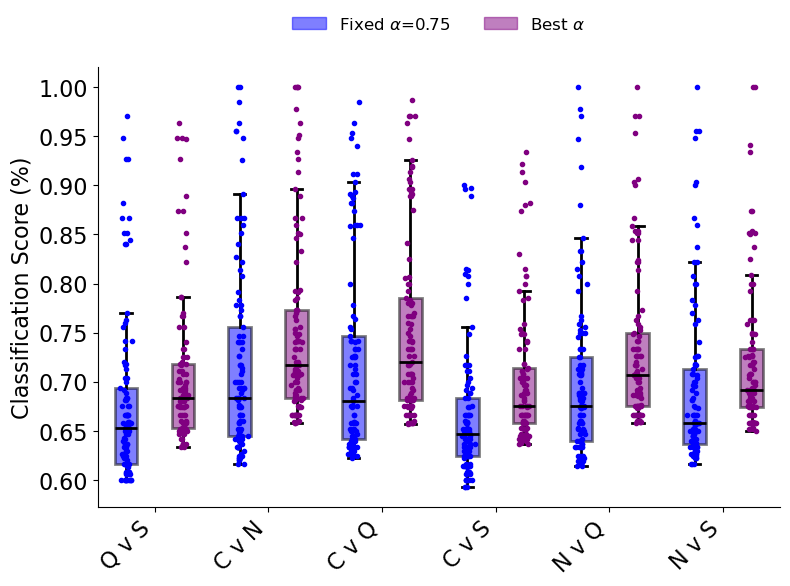

In [75]:
import matplotlib.patches as mpatches
# Second panel with rotated x-axis labels
fig2, ax2 = plt.subplots(figsize=(8, 6))

# Suppressing the open circles for the outliers (fliers) by setting `marker=None`
boxplot2 = ax2.boxplot([dataset2_scores,ds1_scores, dataset3_scores,ds2_scores,dataset4_scores, ds3_scores, dataset5_scores,ds4_scores, dataset6_scores,ds5_scores, dataset7_scores,ds6_scores], 
                       patch_artist=True, showmeans=False, widths=0.4,
                       flierprops=dict(marker=None))  # Suppress fliers

#ax2.set_xticks([1, 2, 3, 4, 5, 6,7,8,9,10,11,12]) 
#ax2.set_xticklabels(['Q v S', 'Q v S','C v N', 'C v N','C v Q','C v Q', 'C v S', 'C v S','N v Q', 'N v Q','N v S','N v S'], fontsize=16, rotation=45, ha='right')  # Rotate labels
ax2.set_xticks([1.5,3.5,5.5,7.5,9.5,11.5])
ax2.set_xticklabels(['Q v S','C v N','C v Q', 'C v S', 'N v Q', 'N v S'], fontsize=16, rotation=45, ha='right')  # Rotate labels
ax2.set_ylabel('Classification Score (%)', fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)

# Customizing box colors with opacity for the second panel
colors2 = ['blue', 'purple', 'blue', 'purple', 'blue', 'purple','blue', 'purple', 'blue', 'purple', 'blue', 'purple']
for patch, color in zip(boxplot2['boxes'], colors2):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)  # Set opacity for the box face color

# Adjusting the line thickness for the boxplot
for element in ['boxes', 'whiskers', 'caps']:
    plt.setp(boxplot2[element], linewidth=2.0)  # Adjust the thickness (2.0 is an example, can be increased or decreased)

# Setting the median line to black and making it thicker
plt.setp(boxplot2['medians'], color='black', linewidth=2.0)

# Adding gridlines to the second panel
#ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding individual data points as jittered points
for i, (scores,color) in enumerate(zip([dataset2_scores,ds1_scores, dataset3_scores,ds2_scores,dataset4_scores, ds3_scores, dataset5_scores,ds4_scores, dataset6_scores,ds5_scores, dataset7_scores,ds6_scores],colors2)):
    x = np.random.normal(i +1, 0.04, size=len(scores))  # Adjusted x positions
    ax2.plot(x, scores, '.', color=color, alpha=1.0)

# Removing the right and top spines for the second panel
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Creating legend patches
fixed_alpha_patch = mpatches.Patch(color='blue', alpha=0.5, label=r'Fixed $\alpha$=0.75')
best_alpha_patch = mpatches.Patch(color='purple', alpha=0.5, label=r'Best $\alpha$')

# Adding the legend at the top of the plot
ax2.legend(handles=[fixed_alpha_patch, best_alpha_patch], loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, fontsize=12, frameon=False)

plt.tight_layout()
plt.savefig('GCtaste_popalpha_vs_individalpha.svg', format='svg')
plt.show()
